# Predicting Diabetes Risk

This project aims to predict the risk of diabetes using machine learning techniques, leveraging demographic information and health indicators.it utilizes features such as pregnancies, glucose levels, blood pressure, and more to train models for accurate predictions.
The project collected data from the Kaggle dataset titled "Diabetes Dataset for Beginners," consisting of 768 rows and 9 columns, with a size of 40KB.
The project utilizes Python libraries for data analysis and machine learning, with tools like pandas, scikit-learn, and matplotlib.







## Downloading the Dataset

I found this data set from Kaggle.

Link : https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

Here we are using pandas, numpy, matplotlib, seaborn and few other libraries. we need to load/import them.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
pip install --upgrade opendatasets kaggle


Note: you may need to restart the kernel to use updated packages.


In [15]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners'
od.download('https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners')

Skipping, found downloaded files in "./diabetes-dataset-for-beginners" (use force=True to force download)


## Data Preparation and Cleaning



Using pandas we are retreiving the csv file to the data frame given as data.

In [18]:
data = pd.read_csv('/Users/navyasri//diabetes-dataset-for-beginners/diabetes.csv')

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Here we clean the dataset

1.   Explore the number of rows &   columns, ranges of values etc.
2.   Handle missing, incorrect and invalid data.

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Using .info() we get datatype of values and get null values.

In [11]:
data.shape

(768, 9)

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We use .describe to get the maximum,minimum and other statistical values in our dataframe.

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We use .isna and add them to know if there any na values in our dataframe.

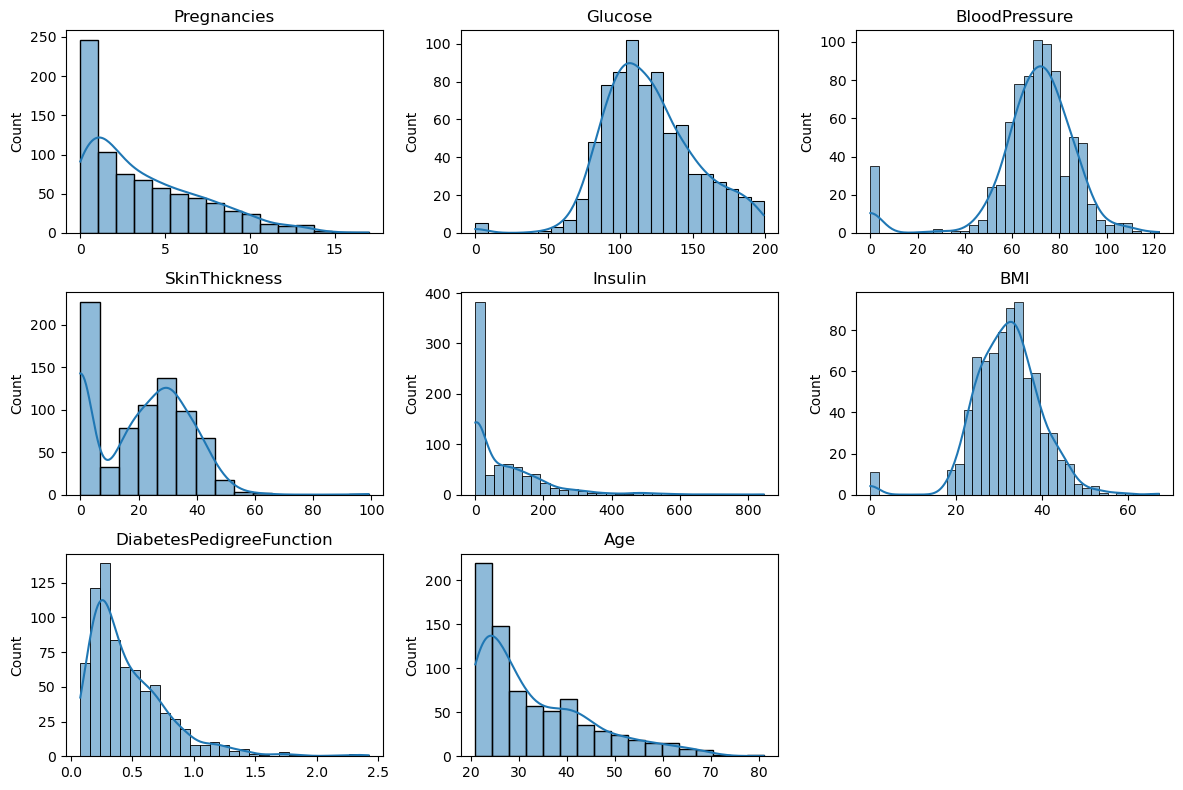

In [22]:
# Data Distribution Plots
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()